In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/imaad/rejects.csv")
df = df.drop("company",1)


In [3]:
df.tail()

,email,status
18,sorry for the long delay of my answer.From my ...,not_reject
19,I just realized I forgot to send you the topic...,not_reject
20,"Hi Imaad,you did not send me the file.We also ...",not_reject
21,"Thank you for your reply. As far as I know, th...",not_reject
22,"I’m Sam Nelson, the Product Lead for Udacity’s...",not_reject


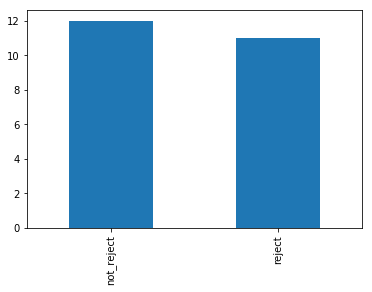

In [4]:
import string
import matplotlib.pyplot as plt

#converting to lowercase
df.email = df.email.apply(lambda x: x.lower())
#removing punctuations
df.email = df.email.apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))
#removing numbers
df.email = df.email.apply(lambda x: x.translate(str.maketrans('','','1234567890')))



df['status'].value_counts().plot(kind="bar")
plt.show()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# pull the data into vectors
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['email'])

encoder = LabelEncoder()
y = encoder.fit_transform(df['status'])

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# take a look at the shape of each of these
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(18, 1217)
(18,)
(5, 1217)
(5,)


In [6]:
%%time 

nb = MultinomialNB()
nb.fit(x_train, y_train)

CPU times: user 5.3 ms, sys: 476 µs, total: 5.78 ms
Wall time: 4.74 ms


In [7]:
def predict_reject(title):
    category_names = {'reject' : 'reject', 'not_reject' : 'not_reject'}
    cod = nb.predict(vectorizer.transform([title]))
    return category_names[encoder.inverse_transform(cod)[0]]


print(predict_reject("We hope the best for your future"))
print(predict_reject("Good Luck"))
print(predict_reject("It was great having you"))

print(predict_reject("For more details, refer chapter 2"))
print(predict_reject("President of USA announces a new policy"))
print(predict_reject("It was raining this morning"))



reject
reject
reject
not_reject
not_reject
not_reject


/home/imaad/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/imaad/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/imaad/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/imaad/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambig

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(x_test, y_test)))


Accuracy: 1.0


In [9]:
x_test_clv_pred = clf.predict(x_test)
confusion_matrix(y_test, x_test_clv_pred)
print(classification_report(y_test, x_test_clv_pred, target_names=encoder.classes_))

             precision    recall  f1-score   support

 not_reject       1.00      1.00      1.00         3
     reject       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         5

